In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
x_test.shape

(10000, 28, 28)

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
single_image = x_train[0]

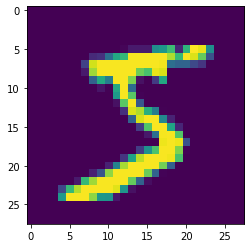

In [13]:
plt.imshow(single_image)

In [14]:
single_image.shape

(28, 28)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_cat_test = to_categorical(y_test)

In [17]:
y_cat_train = to_categorical(y_train)

In [18]:
y_cat_test.shape

(10000, 10)

In [19]:
y_cat_train.shape

(60000, 10)

In [20]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Scaling the image

In [21]:
x_train = x_train/255

In [22]:
x_test = x_test/255

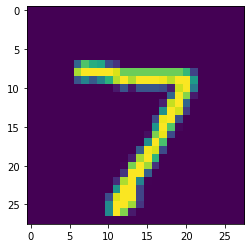

In [23]:
plt.imshow(x_test[0])

### Reshapinth the data

In [26]:
x_test = x_test.reshape(10000,28,28,1)

In [27]:
x_train = x_train.reshape(60000,28,28,1)

In [28]:
x_test.shape

(10000, 28, 28, 1)

In [30]:
x_train.shape

(60000, 28, 28, 1)

## Creating our model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,MaxPool2D, Dense, Conv2D
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
stop = EarlyStopping(monitor="val_loss", mode="min",patience=5)

In [38]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (4,4),strides = (1,1)
                 , padding = "valid", input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 120, activation = "relu"))
model.add(Dense(units = 10, activation  ="softmax"))
model.compile(optimizer = "adam", loss = "categorical_crossentropy")

In [39]:
model.fit(x_train,y_cat_train, validation_data=(x_test,y_cat_test), epochs=30, callbacks=[stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 432s 7ms/sample - loss: 0.1396 - val_loss: 0.0533
Epoch 2/30
60000/60000 [==============================] - 429s 7ms/sample - loss: 0.0469 - val_loss: 0.0399
Epoch 3/30
60000/60000 [==============================] - 432s 7ms/sample - loss: 0.0295 - val_loss: 0.0505
Epoch 4/30
60000/60000 [==============================] - 438s 7ms/sample - loss: 0.0201 - val_loss: 0.0427
Epoch 5/30
60000/60000 [==============================] - 436s 7ms/sample - loss: 0.0140 - val_loss: 0.0425
Epoch 6/30
60000/60000 [==============================] - 429s 7ms/sample - loss: 0.0102 - val_loss: 0.0431
Epoch 7/30
60000/60000 [==============================] - 430s 7ms/sample - loss: 0.0085 - val_loss: 0.0460


In [40]:
metrics = pd.DataFrame(model.history.history)

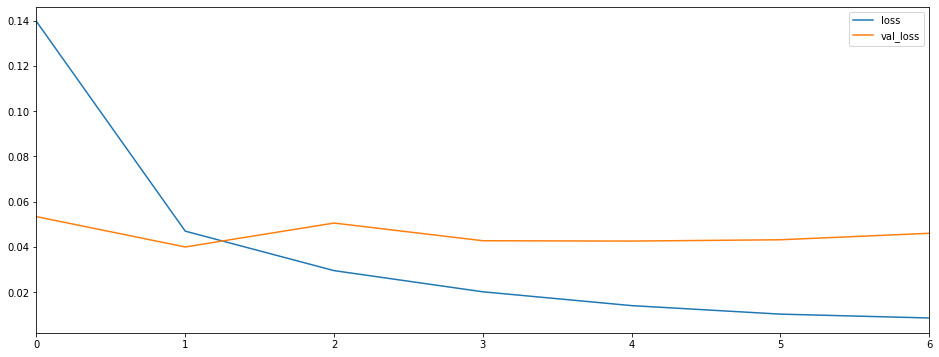

In [43]:
metrics.plot(figsize = (16,6))

In [52]:
rounded_labels=np.argmax(y_test)
rounded_labels[1]

IndexError: invalid index to scalar variable.

In [53]:
predict = model.predict_classes(x_test)

KeyboardInterrupt: 